#   EXPLORATORY DATA ANALYSIS

# introduction


This dataset provides comprehensive financial and stock performance data for various companies across different industries. It contains 295,046 records spanning key metrics related to stock market activities, making it suitable for analyzing trends, performance, and other financial patterns.This dataset is ideal for conducting financial analysis, market trends research, and gaining industry insights

# overview

This dataset is a collection of stock market data for various companies, spanning multiple industries and regions. It provides a robust foundation for analyzing financial performance, market trends, and industry comparisons and is an excellent resource for financial analysis, enabling exploration of stock market dynamics and performance across industries. 








# introduction to tools

Python:

   Python is a powerful, high-level programming language known for its simplicity and versatility. Developed in the late 1980s by Guido van Rossum, Python has become one of the most popular languages for beginners and experts alike, thanks to its readable syntax and extensive library support. It is widely used across various fields, including data science, web development, machine learning, automation, and software development.

   Pandas:

   Pandas is a powerful and widely used Python library for data manipulation and analysis, particularly popular in data science and analytics. Created by Wes McKinney in 2008, Pandas provides data structures and functions that make it easy to clean, transform, and analyze structured data efficiently. The library’s two primary data structures are the Series, for one-dimensional data, and the DataFrame, for two-dimensional tabular data, similar to a spreadsheet or SQL table.

   Matplotlib:

   Matplotlib is a popular data visualization library in Python, designed to create static, animated, and interactive plots. Initially developed by John D. Hunter in 2003, it has become one of the go-to tools for visualizing data, particularly in data science, engineering, and scientific research. Matplotlib provides a wide range of plotting capabilities, from simple line and scatter plots to complex multi-panel figures.

   Seaborn:

   Seaborn is a powerful Python library for statistical data visualization, built on top of Matplotlib. It simplifies the process of creating visually appealing and informative statistical graphics, especially for complex datasets. Developed by Michael Waskom, Seaborn provides an intuitive API that makes it easy to create a wide range of plot types, from simple bar charts and histograms to advanced visualizations like heatmaps, violin plots, and pair plots.

   Numpy:

   NumPy, short for "Numerical Python," is a foundational Python library for numerical computing, particularly valued for its efficient handling of large multi-dimensional arrays and matrices. Developed in 2006 by Travis Oliphant, NumPy provides essential data structures, such as ndarrays (N-dimensional arrays), that allow for fast and efficient array processing. It also includes a vast array of mathematical functions for performing operations on these arrays, making it a cornerstone for scientific and analytical computing in Python.

# which is the most occuring country 

                        Date        Open        High         Low       Close  \
0  2024-08-30 00:00:00-04:00    4.640000    4.879900    4.590000    4.660000   
1  2024-08-30 00:00:00-04:00    9.800000   10.000000    9.760000    9.890000   
2  2024-08-30 00:00:00-04:00   72.199997   72.570000   71.779999   72.470001   
3  2024-08-30 00:00:00-04:00  700.359985  701.859985  688.159973  701.349976   
4  2024-08-30 00:00:00-04:00   31.400000   31.440001   30.240000   31.139999   

       Volume             Brand_Name Ticker     Industry_Tag Country  \
0  14601416.0                peloton   PTON          fitness     usa   
1   5883200.0               zoominfo     ZI       technology     usa   
2  18619200.0  the coca-cola company     KO  food & beverage     usa   
3   3264700.0                netflix   NFLX    entertainment     usa   
4   3519300.0            foot locker     FL         footwear     usa   

   Dividends  Stock Splits  Capital Gains  
0        0.0           0.0            NaN 

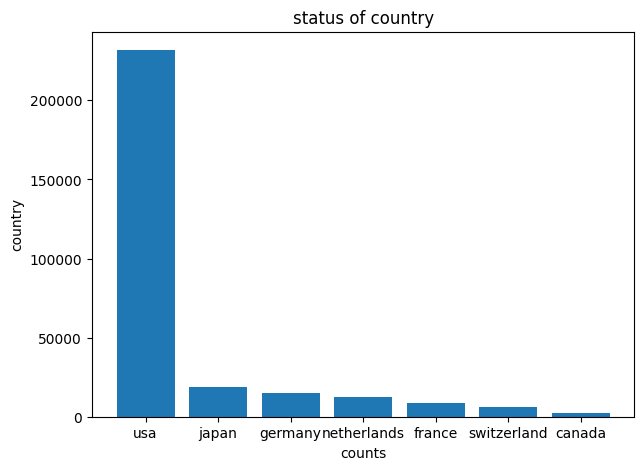

2.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\salvi\\OneDrive\\Desktop\\datascience\\dataset\\wdata.csv")  # Replace "your_dataset.csv" with the actual file path

# Explore the data
print(data.head())  # Display the first few rows
print(data.info())  # Get information about data types and missing values
print(data.describe())  # Calculate summary statistics

#1.most occuring country 


counts=data['Country'].value_counts()
ss=counts.index
cc=counts.values
# print(ss)
# print(cc)
print(counts)
plt.figure(figsize=(7,5))
plt.bar(ss,cc,)
plt.xlabel('counts')
plt.ylabel('country')
plt.title('status of country')
plt.show()



2.



# Which industries have the highest average closing prices? How do these compare across companies within the same industry?

   Industry_Tag                 Brand_Name       Close
0       apparel                     adidas   68.692306
1       apparel  american eagle outfitters   11.857593
2       apparel                       nike   42.501185
3       apparel                       puma   49.618648
4    automotive                  bmw group   65.158603
..          ...                        ...         ...
56   technology                    philips   23.996447
57   technology         salesforce / slack   88.650483
58   technology                       uber   42.637700
59   technology  zoom video communications  157.499298
60   technology                   zoominfo   36.123246

[61 rows x 3 columns]


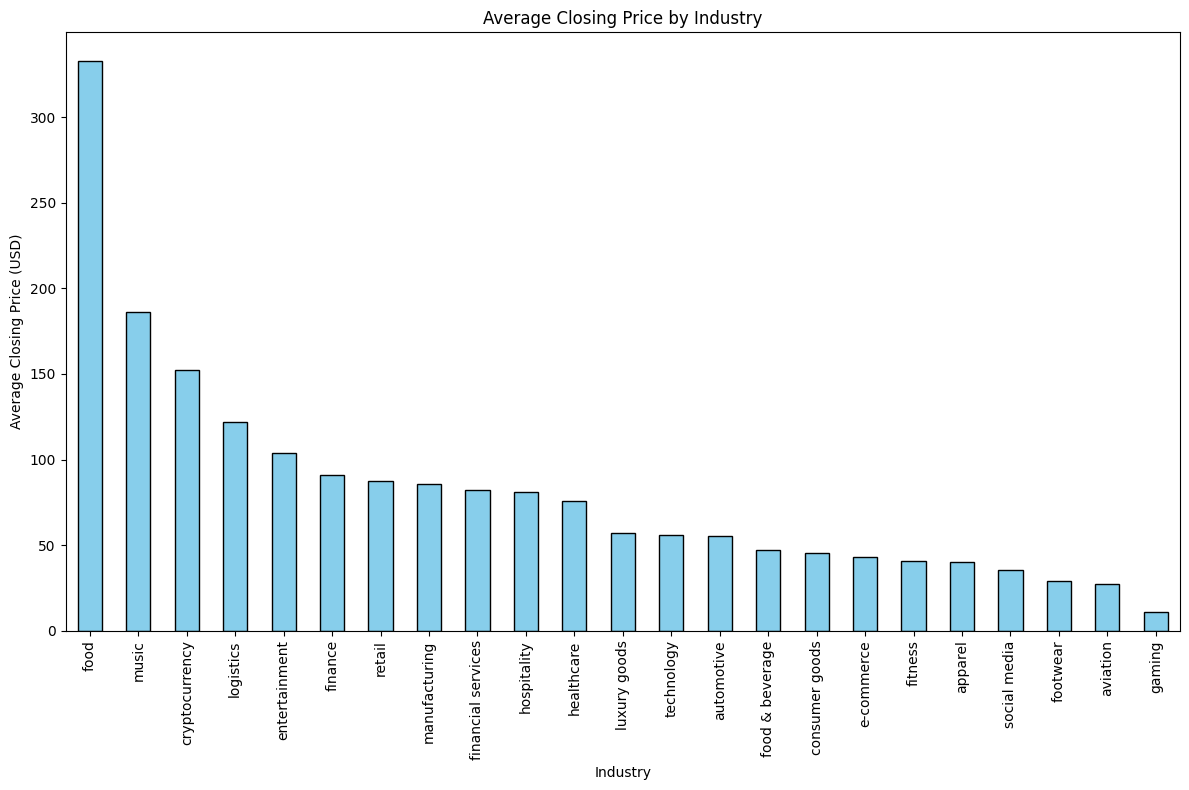

In [7]:
# Calculate the average closing price by industry
a=industry_avg_close = data.groupby('Industry_Tag')['Close'].mean().sort_values(ascending=False)

# Calculate the average closing price for each company within each industry
b=company_avg_close_by_industry = data.groupby(['Industry_Tag', 'Brand_Name'])['Close'].mean().reset_index()
company_avg_close_by_industry_sorted = company_avg_close_by_industry.sort_values(['Industry_Tag', 'Close'], ascending=[True, False])
# print(a)
print(b)
industry_avg_close, company_avg_close_by_industry_sorted.head(20)
import matplotlib.pyplot as plt

# Plotting average closing price by industry as a bar plot
plt.figure(figsize=(12, 8))
industry_avg_close.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Closing Price by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Which companies or industries exhibit the highest price volatility? Is there a pattern in volatility based on industry or country?


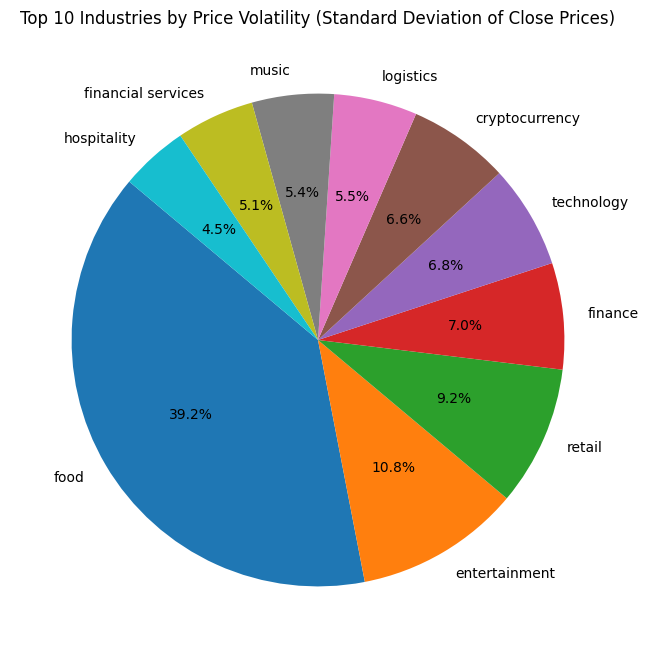

In [5]:
# Calculate price volatility (standard deviation of the 'Close' price) by industry and by company within each industry
industry_volatility = data.groupby('Industry_Tag')['Close'].std().sort_values(ascending=False)
company_volatility_by_industry = data.groupby(['Industry_Tag', 'Brand_Name'])['Close'].std().reset_index()
company_volatility_by_industry_sorted = company_volatility_by_industry.sort_values(['Industry_Tag', 'Close'], ascending=[True, False])

# Calculate price volatility by country for comparison
country_volatility = data.groupby('Country')['Close'].std().sort_values(ascending=False)

industry_volatility, company_volatility_by_industry_sorted.head(20), country_volatility
# Filter top 10 most volatile industries for a pie chart visualization
top_10_industries_volatility = industry_volatility.head(10)

# Plotting a pie chart for industry volatility
plt.figure(figsize=(10, 8))
plt.pie(top_10_industries_volatility, labels=top_10_industries_volatility.index, 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Top 10 Industries by Price Volatility (Standard Deviation of Close Prices)')
plt.show()



# Are there companies or industries that have shown consistent growth trends?

Brand_Name
chipotle                     15.249607
coinbase                      9.682569
zoom video communications     7.411951
spotify                       7.106418
airbnb                        5.622837
netflix                       4.508263
block                         3.726002
adobe                         3.632421
tesla                         3.480849
mastercard                    2.990618
roblox                        2.874331
costco                        2.805574
fedex                         2.581440
peloton                       2.474570
salesforce / slack            2.284650
hilton                        2.154372
shopify                       2.067042
the home depot                1.995268
visa                          1.924824
zoominfo                      1.911931
Name: Spread, dtype: float64


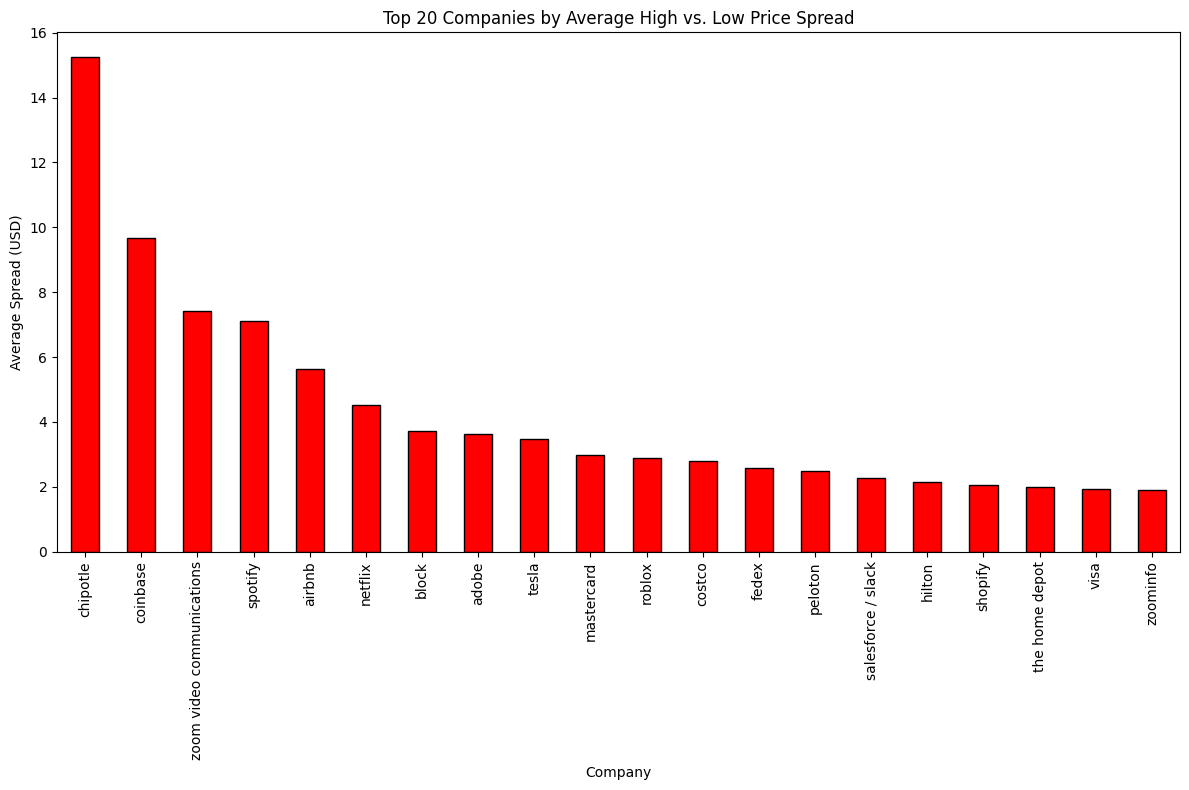

In [10]:
# Calculate the spread between High and Low prices for each record
data['Spread'] = data['High'] - data['Low']

# Calculate the average spread for each company
company_avg_spread = data.groupby('Brand_Name')['Spread'].mean().sort_values(ascending=False)

# Calculate the average spread by industry
industry_avg_spread = data.groupby('Industry_Tag')['Spread'].mean().sort_values(ascending=False)

# Visualize high vs. low price spread by company (top 20 for readability)
kl=top_20_company_spread = company_avg_spread.head(20)
print(kl)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
top_20_company_spread.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 20 Companies by Average High vs. Low Price Spread')
plt.xlabel('Company')
plt.ylabel('Average Spread (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Which stocks show the highest growth in closing price over time?

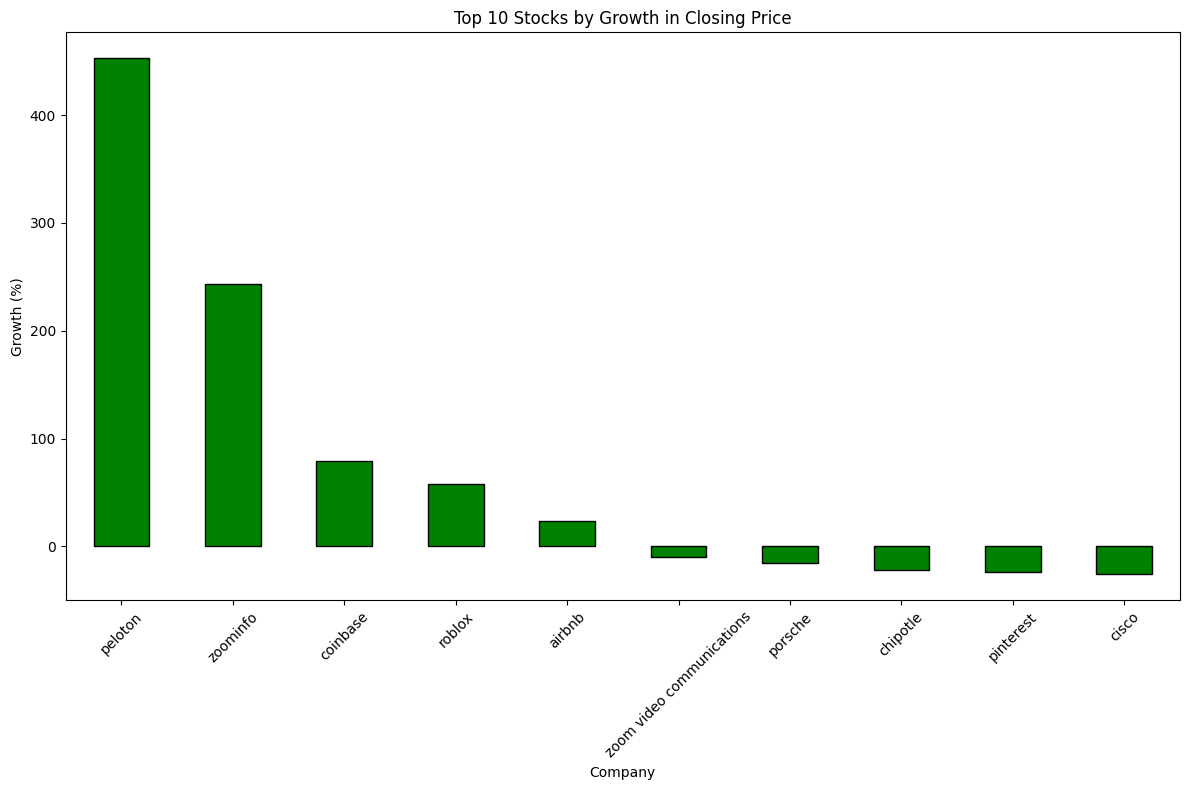

,Start_Price,End_Price,Growth (%)
Brand_Name,,,
peloton,4.660000,25.760000,452.789723
zoominfo,9.890000,34.000000,243.781586
coinbase,183.360001,328.279999,79.035775
roblox,43.990002,69.500000,57.990446
airbnb,117.309998,144.710007,23.356926
zoom video communications,69.080002,62.000000,-10.248989
porsche,4.450000,3.758905,-15.530212
chipotle,56.080002,44.000000,-21.540659
pinterest,32.040001,24.400000,-23.845197


In [9]:
# Calculate total growth in closing price for each stock over the dataset's time period
total_growth = data.groupby('Brand_Name').agg(
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last')
)
total_growth['Growth (%)'] = ((total_growth['End_Price'] - total_growth['Start_Price']) / total_growth['Start_Price']) * 100

# Sort stocks by highest growth percentage
top_growth_stocks = total_growth.sort_values('Growth (%)', ascending=False).head(10)

# Visualize the top 10 stocks with highest growth in closing price
plt.figure(figsize=(12, 8))
top_growth_stocks['Growth (%)'].plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Stocks by Growth in Closing Price')
plt.xlabel('Company')
plt.ylabel('Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_growth_stocks


# How does trading volume correlate with price changes?

<Axes: xlabel='Volume', ylabel='Price Change (%)'>

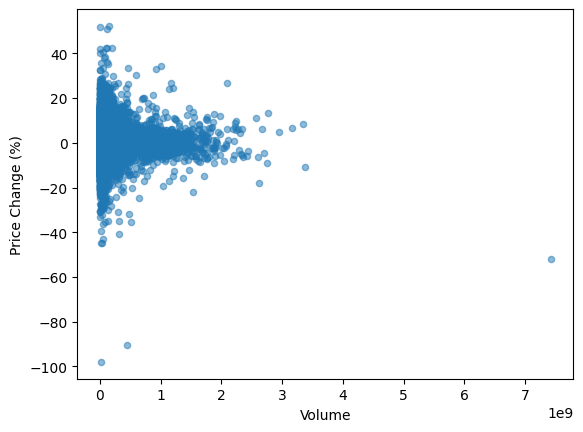

In [22]:
#calculate daily price change
data['Price Change (%)'] = data.groupby('Ticker')['Close'].pct_change() * 100
#analyse correlation wit trading volume
correlation = data[['Price Change (%)', 'Volume']].corr()
#plotting the relationship
data.plot.scatter(x='Volume', y='Price Change (%)', alpha=0.5)



# How do stock performances differ by country?

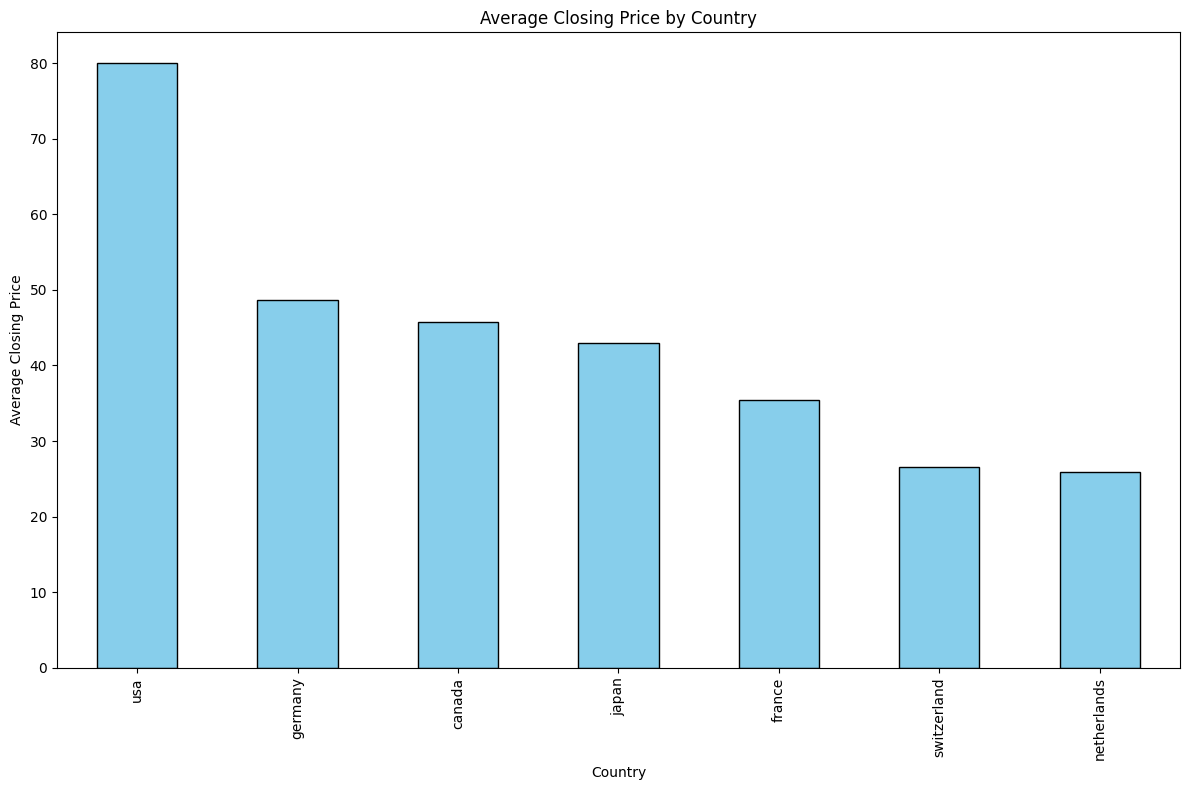

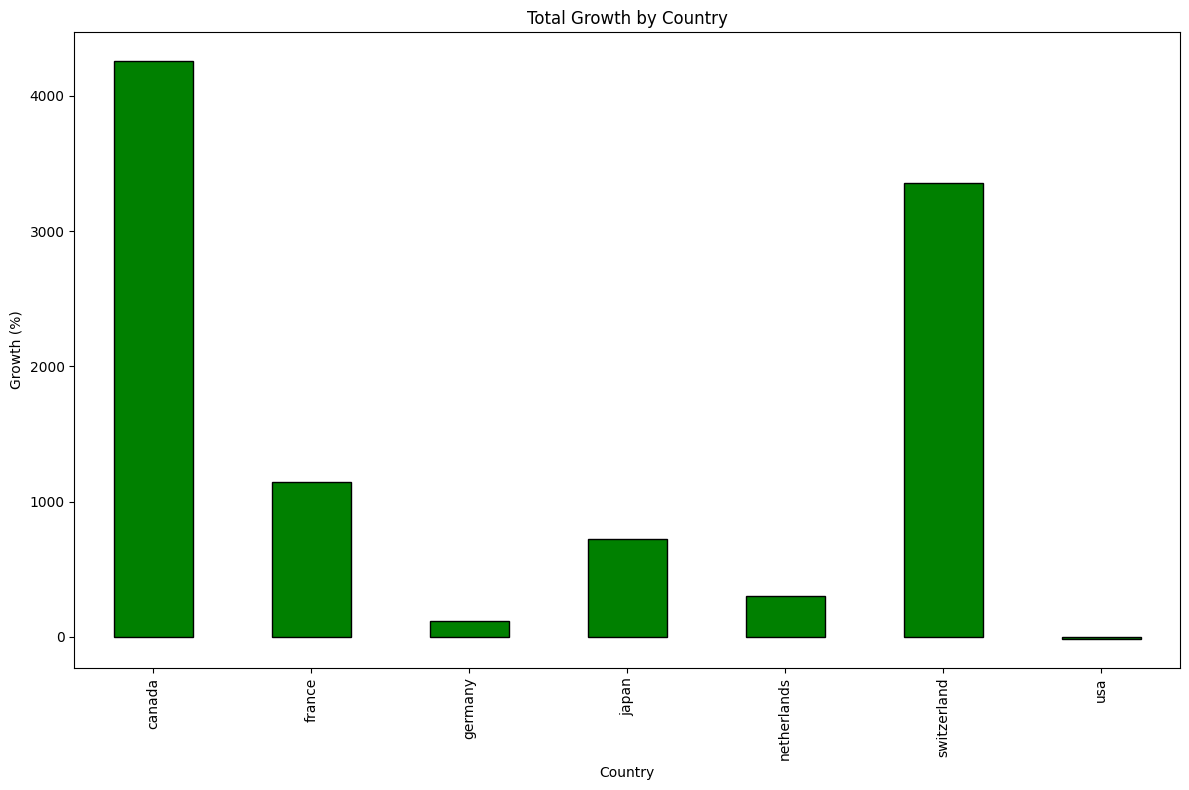

In [21]:
#calculate average closing price by country
country_avg_close = data.groupby('Country')['Close'].mean().sort_values(ascending=False)
#stock performance volatility by country
country_volatility = data.groupby('Country')['Close'].std().sort_values(ascending=False)
#calculate total growth 0f each country
country_growth = data.groupby('Country').agg(
    Start_Price=('Close', 'first'),
    End_Price=('Close', 'last')
)
country_growth['Growth (%)'] = ((country_growth['End_Price'] - country_growth['Start_Price']) / country_growth['Start_Price']) * 100
#visualization
# Plotting average closing price by country
country_avg_close.plot(kind='bar', figsize=(12, 8), color='skyblue', edgecolor='black')
plt.title('Average Closing Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting stock performance growth by country
country_growth['Growth (%)'].plot(kind='bar', figsize=(12, 8), color='green', edgecolor='black')
plt.title('Total Growth by Country')
plt.xlabel('Country')
plt.ylabel('Growth (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




# Does trading volume differ significantly by country or industry?

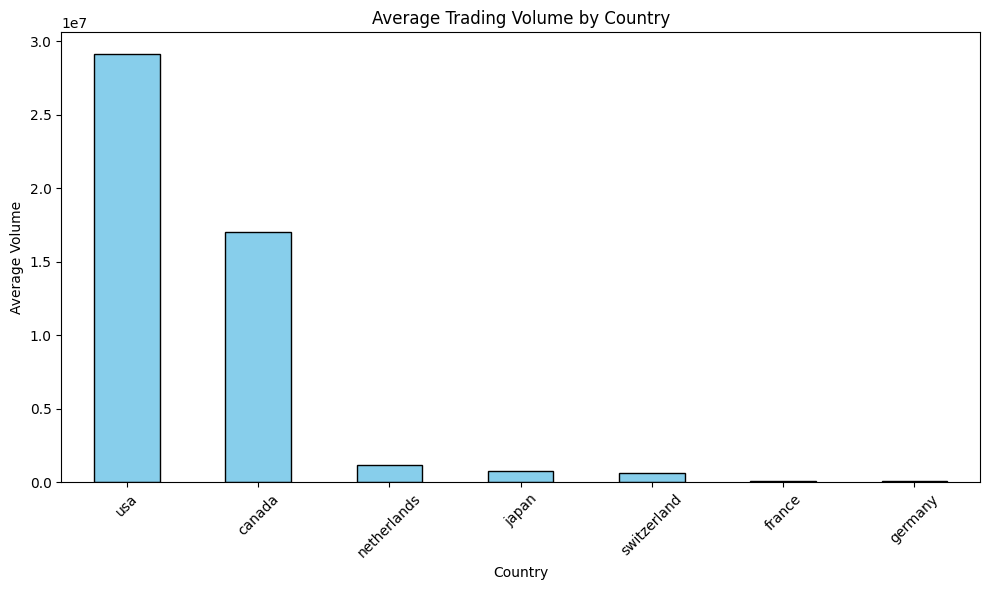

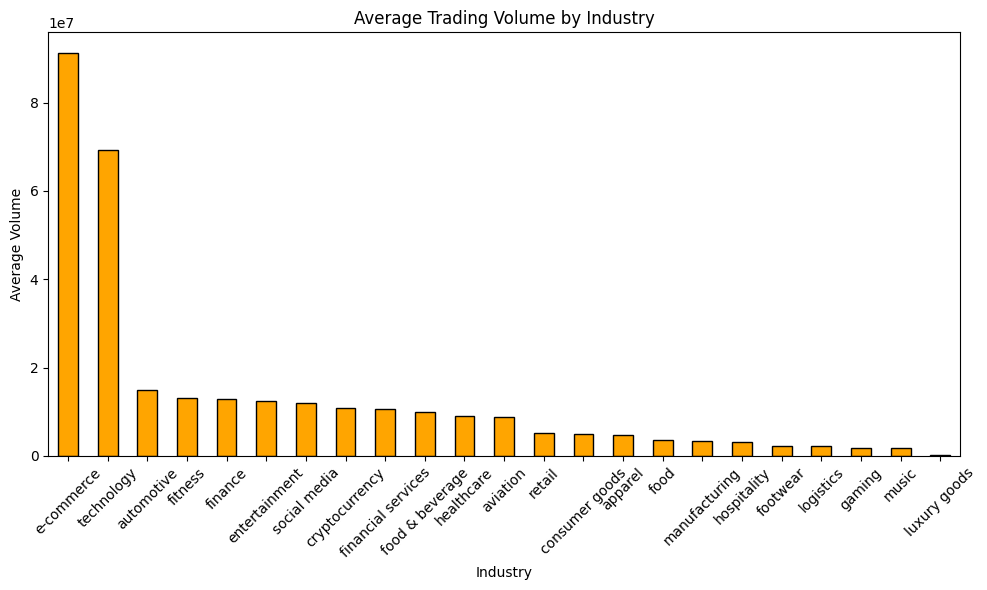

(Country
 usa            2.916387e+07
 canada         1.701548e+07
 netherlands    1.162301e+06
 japan          7.417560e+05
 switzerland    6.094879e+05
 france         8.726545e+04
 germany        6.438379e+04
 Name: Volume, dtype: float64,
 Industry_Tag
 e-commerce            9.132847e+07
 technology            6.917780e+07
 automotive            1.497952e+07
 fitness               1.302256e+07
 finance               1.281812e+07
 entertainment         1.252831e+07
 social media          1.203051e+07
 cryptocurrency        1.087812e+07
 financial services    1.060103e+07
 food & beverage       9.910353e+06
 healthcare            9.043662e+06
 aviation              8.763896e+06
 retail                5.187718e+06
 consumer goods        4.862004e+06
 apparel               4.784922e+06
 food                  3.491136e+06
 manufacturing         3.477403e+06
 hospitality           3.108341e+06
 footwear              2.210364e+06
 logistics             2.152788e+06
 gaming                

In [10]:
# data['Month'] = data['Date'].dt.month
# data['Quarter'] = data['Date'].dt.quarter
# #
# monthly_trends = data.groupby('Month')[['Close', 'Volume']].mean()
# #
# quarterly_trends = data.groupby('Quarter')[['Close', 'Volume']].mean()
# #
# industry_monthly_trends = data.groupby(['Industry_Tag', 'Month'])[['Close', 'Volume']].mean().reset_index()
# industry_quarterly_trends = data.groupby(['Industry_Tag', 'Quarter'])[['Close', 'Volume']].mean().reset_index()
# #
# import matplotlib.pyplot as plt

# # Line plot for monthly trends
# plt.figure(figsize=(12, 6))
# monthly_trends['Close'].plot(kind='line', marker='o', color='blue', label='Average Close Price')
# plt.title('Average Close Price by Month')
# plt.xlabel('Month')
# plt.ylabel('Average Close Price')
# plt.grid()
# plt.legend()
# plt.show()

# # Bar chart for quarterly trends
# quarterly_trends['Close'].plot(kind='bar', color='orange', edgecolor='black')
# plt.title('Average Close Price by Quarter')
# plt.xlabel('Quarter')
# plt.ylabel('Average Close Price')
# plt.show()
# Analyze trading volume by country and industry
volume_by_country = data.groupby('Country')['Volume'].mean().sort_values(ascending=False)
volume_by_industry = data.groupby('Industry_Tag')['Volume'].mean().sort_values(ascending=False)

# Visualize the results
import matplotlib.pyplot as plt

# Bar chart for trading volume by country
plt.figure(figsize=(10, 6))
volume_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Trading Volume by Country')
plt.xlabel('Country')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for trading volume by industry
plt.figure(figsize=(10, 6))
volume_by_industry.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Trading Volume by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display summary statistics for trading volume
volume_by_country, volume_by_industry


# Which industry shows the highest average stock price over the dataset's timeline?


In [16]:

# Calculate the average stock price for each industry
data['Average Price'] = (data['Open'] + data['Close']) / 2
industry_avg_price = data.groupby('Industry_Tag')['Average Price'].mean().sort_values(ascending=False)

# Find the industry with the highest average price
highest_avg_industry = industry_avg_price.idxmax()
highest_avg_price = industry_avg_price.max()

industry_avg_price, highest_avg_industry, highest_avg_price




(Industry_Tag
 food                  333.042796
 music                 186.389201
 cryptocurrency        152.393564
 logistics             121.795742
 entertainment         103.739850
 finance                90.655226
 retail                 87.604290
 manufacturing          85.726544
 financial services     81.984119
 hospitality            81.156704
 healthcare             75.559383
 luxury goods           57.103750
 technology             55.775272
 automotive             55.538408
 food & beverage        47.026883
 consumer goods         45.093718
 e-commerce             43.023261
 fitness                40.795205
 apparel                40.110461
 social media           35.332391
 footwear               29.097860
 aviation               27.100524
 gaming                 10.634253
 Name: Average Price, dtype: float64,
 'food',
 333.04279556615325)

# How are the rare Capital Gains values distributed, and can any patterns be identified?

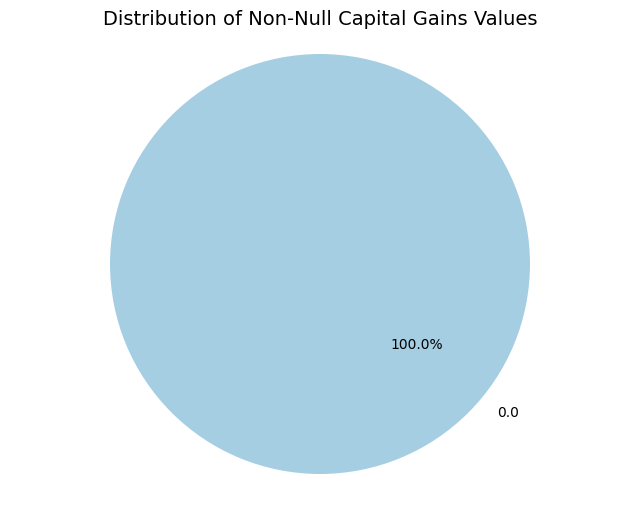

Capital Gains
0.0    2
Name: count, dtype: int64

In [20]:
# Analyze the Capital Gains column for patterns
capital_gains_non_null = data[data['Capital Gains'].notnull()]

# Summary statistics and sample records for non-null Capital Gains
capital_gains_summary = capital_gains_non_null['Capital Gains'].describe()
capital_gains_sample = capital_gains_non_null[['Date', 'Brand_Name', 'Ticker', 'Industry_Tag', 'Capital Gains']]

capital_gains_summary, capital_gains_sample.head()
# Check the distribution of the 'Capital Gains' column where it is non-null
capital_gains_non_null = data[data['Capital Gains'].notnull()]

# Group by unique values to identify distribution patterns
capital_gains_distribution = capital_gains_non_null['Capital Gains'].value_counts()

# Prepare the pie chart for visualizing the distribution
plt.figure(figsize=(8, 6))
plt.pie(
    capital_gains_distribution,
    labels=capital_gains_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors[:len(capital_gains_distribution)],
)
plt.title('Distribution of Non-Null Capital Gains Values', fontsize=14)
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

capital_gains_distribution
